In [1]:
pip install opencv-python


  Using cached opencv_python-4.7.0.68-cp37-abi3-macosx_11_0_arm64.whl (31.1 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 40.6 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install torch

  Using cached torch-1.13.1-cp310-none-macosx_11_0_arm64.whl (53.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install Pillow

  Using cached Pillow-9.4.0-cp310-cp310-macosx_11_0_arm64.whl (3.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

  Using cached matplotlib-3.6.3-cp310-cp310-macosx_11_0_arm64.whl (7.2 MB)
  Using cached kiwisolver-1.4.4-cp310-cp310-macosx_11_0_arm64.whl (63 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
  Using cached contourpy-1.0.7-cp310-cp310-macosx_11_0_arm64.whl (229 kB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
import cv2
# from google.colab.patches import cv2_imshow
import numpy as np
import torch
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
def noise(img,snr):
    h=img.shape[0]
    w=img.shape[1]
    img1=img.copy()
    sp=h*w
    NP=int(sp*(1-snr))
    for i in range (NP):
        randx=np.random.randint(1,h-1)
        randy=np.random.randint(1,w-1)
        if np.random.random()<=0.5:
            img1[randx,randy]=0
        else:
            img1[randx,randy]=255
    return img1

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt


file = open('/Users/kartikaggarwal/Documents/Capstone/imagenet_subset_1.pkl', 'rb')


ds_p = pickle.load(file)
plt.figure()
plt.imshow(ds_p[1])

file.close()

file_noise = open('/Users/kartikaggarwal/Documents/Capstone/noise_train.pkl', 'wb')
file_blur = open('/Users/kartikaggarwal/Documents/Capstone/blur_train.pkl', 'wb')
file_gola = open('/Users/kartikaggarwal/Documents/Capstone/gola_train.pkl', 'wb')
file_nochange = open('/Users/kartikaggarwal/Documents/Capstone/nochange_train.pkl', 'wb')

lst_noise = []
lst_blur = []
lst_gola = []
lst_nochange = []

for i in ds_p[:10000]:
  noiseImage = noise(i, 0.85)

  lst_noise.append(noiseImage)

pickle.dump(lst_noise, file_noise)
file_noise.close()
  
for i in ds_p[10000:20000]:
  blurImage = cv2.blur(i,(5,5))

  lst_blur.append(blurImage)

pickle.dump(lst_blur, file_blur)

file_blur.close()

for i in ds_p[20000:29000]:
  center_coordinates = (64,64)
  radius = 15
  color = (0, 0, 0)
  thickness = -1
  image_new = i.copy()
  image_new = cv2.circle(image_new, center_coordinates, radius, color, thickness)
  lst_gola.append(image_new)


pickle.dump(lst_gola, file_gola)

file_gola.close()

for i in ds_p[29000:]:
  lst_nochange.append(i)

pickle.dump(lst_nochange, file_nochange)
file_nochange.close()

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt


file_test = open('/Users/kartikaggarwal/Documents/Capstone/imagenet_testset.pkl', 'rb')


ds_p_test = pickle.load(file_test)
# plt.figure()
# plt.imshow(ds_p[1])

file_test.close()

file_noise_test = open('/Users/kartikaggarwal/Documents/Capstone/noise_test.pkl', 'wb')
file_blur_test = open('/Users/kartikaggarwal/Documents/Capstone/blur_test.pkl', 'wb')
file_gola_test = open('/Users/kartikaggarwal/Documents/Capstone/gola_test.pkl', 'wb')

lst_noise_test = []
lst_blur_test = []
lst_gola_test = []

for i in ds_p_test[:3000]:
  noiseImage_test = noise(i, 0.85)

  lst_noise_test.append(noiseImage_test)

pickle.dump(lst_noise_test, file_noise_test)
file_noise_test.close()
  
for i in ds_p_test[3000:6000]:
  blurImage_test = cv2.blur(i,(5,5))

  lst_blur_test.append(blurImage_test)

pickle.dump(lst_blur_test, file_blur_test)

file_blur_test.close()

for i in ds_p_test[6000:]:
  center_coordinates = (64,64)
  radius = 15
  color = (0, 0, 0)
  thickness = -1
  image_new_test = i.copy()
  image_new_test = cv2.circle(image_new_test, center_coordinates, radius, color, thickness)
  lst_gola_test.append(image_new_test)


pickle.dump(lst_gola_test, file_gola_test)

file_gola_test.close()

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt


file_val = open('/Users/soumyo/Desktop/Capstone-Project-Image-Reconstruction/imagenet_valset.pkl', 'rb')


ds_p_val = pickle.load(file_val)
# plt.figure()
# plt.imshow(ds_p[1])

file_val.close()

file_noise_val = open('/Users/kartikaggarwal/Documents/Capstone/noise_val.pkl', 'wb')
file_blur_val = open('/Users/kartikaggarwal/Documents/Capstone/blur_val.pkl', 'wb')
file_gola_val = open('/Users/kartikaggarwal/Documents/Capstone/gola_val.pkl', 'wb')

lst_noise_val = []
lst_blur_val = []
lst_gola_val = []

for i in ds_p_val[:3000]:
  noiseImage_val = noise(i, 0.85)

  lst_noise_val.append(noiseImage_val)

pickle.dump(lst_noise_val, file_noise_val)
file_noise_val.close()
  
for i in ds_p_val[3000:6000]:
  blurImage_val = cv2.blur(i,(5,5))

  lst_blur_val.append(blurImage_val)

pickle.dump(lst_blur_val, file_blur_val)

file_blur_val.close()

for i in ds_p_val[6000:]:
  center_coordinates = (64,64)
  radius = 15
  color = (0, 0, 0)
  thickness = -1
  image_new_val = i.copy()
  image_new_val = cv2.circle(image_new_val, center_coordinates, radius, color, thickness)
  lst_gola_val.append(image_new_val)


pickle.dump(lst_gola_val, file_gola_val)

file_gola_val.close()

300


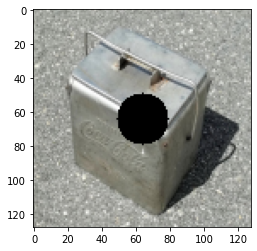

In [ ]:
file4 = open('gola_test.pkl', 'rb')
ds_n = pickle.load(file4)
print(len(ds_n))
plt.imshow(ds_n[0])

300


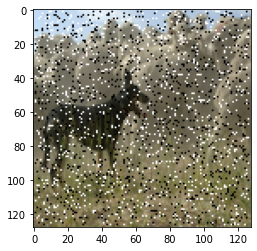

In [ ]:
file5 = open('noise_test.pkl', 'rb')
ds_n = pickle.load(file5)
print(len(ds_n))
plt.imshow(ds_n[0])

300


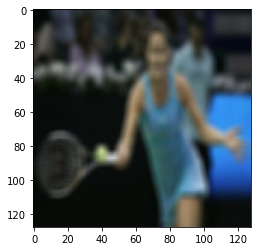

In [ ]:
file6 = open('blur_test.pkl', 'rb')
ds_n = pickle.load(file6)
print(len(ds_n))
plt.imshow(ds_n[5])